# 8. Parameter Tuning

In [ ]:
import project1 as p1
import utils
import numpy as np

#-------------------------------------------------------------------------------
# Data loading. There is no need to edit code in this section.
#-------------------------------------------------------------------------------

train_data = utils.load_data('reviews_train.tsv')
val_data = utils.load_data('reviews_val.tsv')
test_data = utils.load_data('reviews_test.tsv')

train_texts, train_labels = zip(*((sample['text'], sample['sentiment']) for sample in train_data))
val_texts, val_labels = zip(*((sample['text'], sample['sentiment']) for sample in val_data))
test_texts, test_labels = zip(*((sample['text'], sample['sentiment']) for sample in test_data))

dictionary = p1.bag_of_words(train_texts)

train_bow_features = p1.extract_bow_feature_vectors(train_texts, dictionary)
val_bow_features = p1.extract_bow_feature_vectors(val_texts, dictionary)
test_bow_features = p1.extract_bow_feature_vectors(test_texts, dictionary)

perceptron valid: [(1, 0.758), (5, 0.72), (10, 0.716), (15, 0.778), (25, 0.794), (50, 0.79)]
best = 0.7940, T=25.0000
avg perceptron valid: [(1, 0.794), (5, 0.792), (10, 0.798), (15, 0.798), (25, 0.8), (50, 0.796)]
best = 0.8000, T=25.0000
Pegasos valid: tune T [(1, 0.786), (5, 0.78), (10, 0.79), (15, 0.802), (25, 0.806), (50, 0.8)]
best = 0.8060, T=25.0000
Pegasos valid: tune L [(0.001, 0.786), (0.01, 0.806), (0.1, 0.762), (1, 0.568), (10, 0.518)]
best = 0.8060, L=0.0100


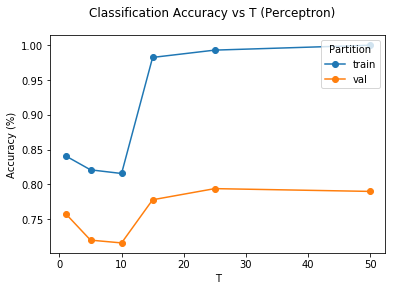

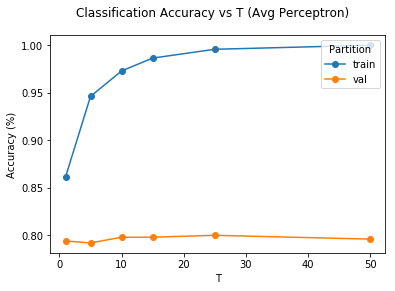

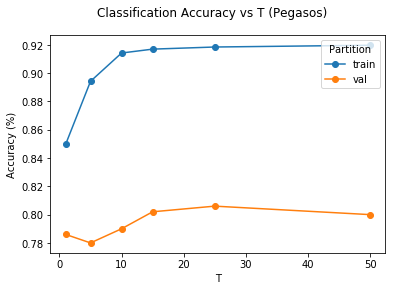

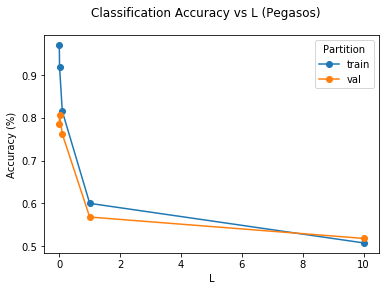

In [3]:
data = (train_bow_features, train_labels, val_bow_features, val_labels)
#
# # values of T and lambda to try
Ts = [1, 5, 10, 15, 25, 50]
Ls = [0.001, 0.01, 0.1, 1, 10]
#
pct_tune_results = utils.tune_perceptron(Ts, *data)
print('perceptron valid:', list(zip(Ts, pct_tune_results[1])))
print('best = {:.4f}, T={:.4f}'.format(np.max(pct_tune_results[1]), Ts[np.argmax(pct_tune_results[1])]))
#
avg_pct_tune_results = utils.tune_avg_perceptron(Ts, *data)
print('avg perceptron valid:', list(zip(Ts, avg_pct_tune_results[1])))
print('best = {:.4f}, T={:.4f}'.format(np.max(avg_pct_tune_results[1]), Ts[np.argmax(avg_pct_tune_results[1])]))
#
# # fix values for L and T while tuning Pegasos T and L, respective
fix_L = 0.01
peg_tune_results_T = utils.tune_pegasos_T(fix_L, Ts, *data)
print('Pegasos valid: tune T', list(zip(Ts, peg_tune_results_T[1])))
print('best = {:.4f}, T={:.4f}'.format(np.max(peg_tune_results_T[1]), Ts[np.argmax(peg_tune_results_T[1])]))
#
fix_T = Ts[np.argmax(peg_tune_results_T[1])]
peg_tune_results_L = utils.tune_pegasos_L(fix_T, Ls, *data)
print('Pegasos valid: tune L', list(zip(Ls, peg_tune_results_L[1])))
print('best = {:.4f}, L={:.4f}'.format(np.max(peg_tune_results_L[1]), Ls[np.argmax(peg_tune_results_L[1])]))
#
utils.plot_tune_results('Perceptron', 'T', Ts, *pct_tune_results)
utils.plot_tune_results('Avg Perceptron', 'T', Ts, *avg_pct_tune_results)
utils.plot_tune_results('Pegasos', 'T', Ts, *peg_tune_results_T)
utils.plot_tune_results('Pegasos', 'L', Ls, *peg_tune_results_L)